In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import numpy as np

pickle_in = open("/content/drive/My Drive/Dataset/face_X.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("/content/drive/My Drive/Dataset/face_Y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
X=np.array(X)
y=np.array(y)

In [ ]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
history=model.fit(X, y, batch_size=32, epochs=40, validation_split=0.2)

Epoch 1/40
721/721 [==============================] - 27s 38ms/step - loss: 0.5501 - accuracy: 0.7980 - val_loss: 1.1919 - val_accuracy: 0.6111
Epoch 2/40
721/721 [==============================] - 27s 37ms/step - loss: 0.5144 - accuracy: 0.8092 - val_loss: 1.2528 - val_accuracy: 0.6031
Epoch 3/40
721/721 [==============================] - 27s 37ms/step - loss: 0.5106 - accuracy: 0.8094 - val_loss: 1.2424 - val_accuracy: 0.6189
Epoch 4/40
721/721 [==============================] - 27s 37ms/step - loss: 0.4898 - accuracy: 0.8221 - val_loss: 1.2530 - val_accuracy: 0.6127
Epoch 5/40
721/721 [==============================] - 27s 37ms/step - loss: 0.4883 - accuracy: 0.8197 - val_loss: 1.2007 - val_accuracy: 0.6309
Epoch 6/40
721/721 [==============================] - 27s 37ms/step - loss: 0.4706 - accuracy: 0.8285 - val_loss: 1.1901 - val_accuracy: 0.6319
Epoch 7/40
721/721 [==============================] - 27s 37ms/step - loss: 0.4590 - accuracy: 0.8318 - val_loss: 1.2398 - val_accuracy:

INFO:tensorflow:Assets written to: /content/drive/My Drive/Model/face2.model/assets


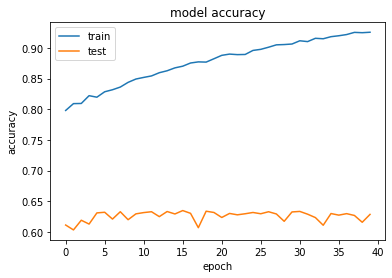

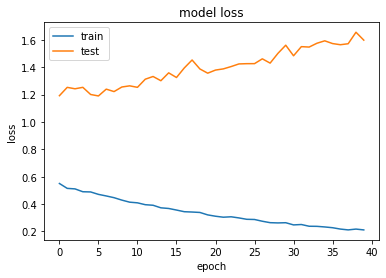

In [ ]:
model.save('/content/drive/My Drive/Model/face2.h5')
model.save('/content/drive/My Drive/Model/face2.model')
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()